In [12]:
# Installing graphviz issues

# !conda install python-graphviz
# !conda install -c anaconda graphviz

In [68]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

from IPython.core.display import HTML

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


In [3]:
iris = load_iris()

X = iris.data[:, 2:] # petal length & width
y = iris.target



In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

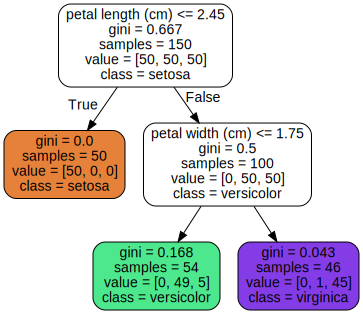

In [11]:
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [14]:
print( tree_clf.predict_proba([[5, 1.5]]) )
print( tree_clf.predict([[5, 1.5]]) )

[[0.         0.90740741 0.09259259]]
[1]


In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

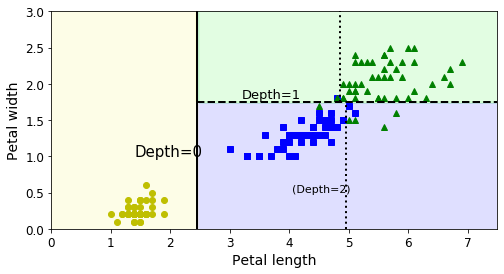

In [16]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [17]:
# Regularization parameters for Decision trees
# min_samples_split, 
# min_samples_leaf, 
# min_wight_fraction_leaf, 
# max_leaf_nodes
# max_features


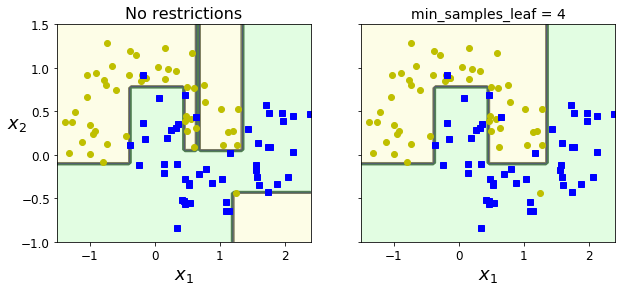

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42) # regularized mnore

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

#save_fig("min_samples_leaf_plot")
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd


X, y = make_moons(n_samples=10000, noise=0.4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decisiontree_params = {'max_leaf_nodes' : list(range(2, 100)),
                  'min_samples_split': [2,3,4, 5]
                 } 
    
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                   param_grid=decisiontree_params, cv=3, verbose=1, n_jobs=-2) # Turn on cv train scores
    
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1176 out of 1176 | elapsed:    1.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-2,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [35]:
df = pd.DataFrame(grid_search_cv.cv_results_)[["rank_test_score", "params", "mean_test_score"]]\
    .sort_values(by="mean_test_score", ascending=False).head(10)
df

,rank_test_score,params,mean_test_score
55,1,"{'max_leaf_nodes': 15, 'min_samples_split': 5}",0.859999
54,1,"{'max_leaf_nodes': 15, 'min_samples_split': 4}",0.859999
53,1,"{'max_leaf_nodes': 15, 'min_samples_split': 3}",0.859999
52,1,"{'max_leaf_nodes': 15, 'min_samples_split': 2}",0.859999
114,5,"{'max_leaf_nodes': 30, 'min_samples_split': 4}",0.859375
115,5,"{'max_leaf_nodes': 30, 'min_samples_split': 5}",0.859375
105,5,"{'max_leaf_nodes': 28, 'min_samples_split': 3}",0.859375
106,5,"{'max_leaf_nodes': 28, 'min_samples_split': 4}",0.859375
107,5,"{'max_leaf_nodes': 28, 'min_samples_split': 5}",0.859375
108,5,"{'max_leaf_nodes': 29, 'min_samples_split': 2}",0.859375


In [37]:
from sklearn.metrics import accuracy_score
#By default, GridSearchCV trains the best model found on the whole 
# training set (you can change this by setting refit=False), so we
# don't need to do it again. 
    
y_pred = grid_search_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

grid_search_cv.best_params_

{'max_leaf_nodes': 15, 'min_samples_split': 2}

In [38]:
len(X_train)

8000

In [47]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=33)

for train_index, test_index in rs.split(X_train):
    X_mini_train = X_train[train_index]
    y_mini_train = y_train[train_index]
    mini_sets.append((X_mini_train, y_mini_train))
    
assert(len(mini_sets) == n_trees)

In [51]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(len(mini_sets))]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.8043969999999999

In [55]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)
    
Y_pred

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1]], dtype=uint8)

In [56]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)



In [57]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8625

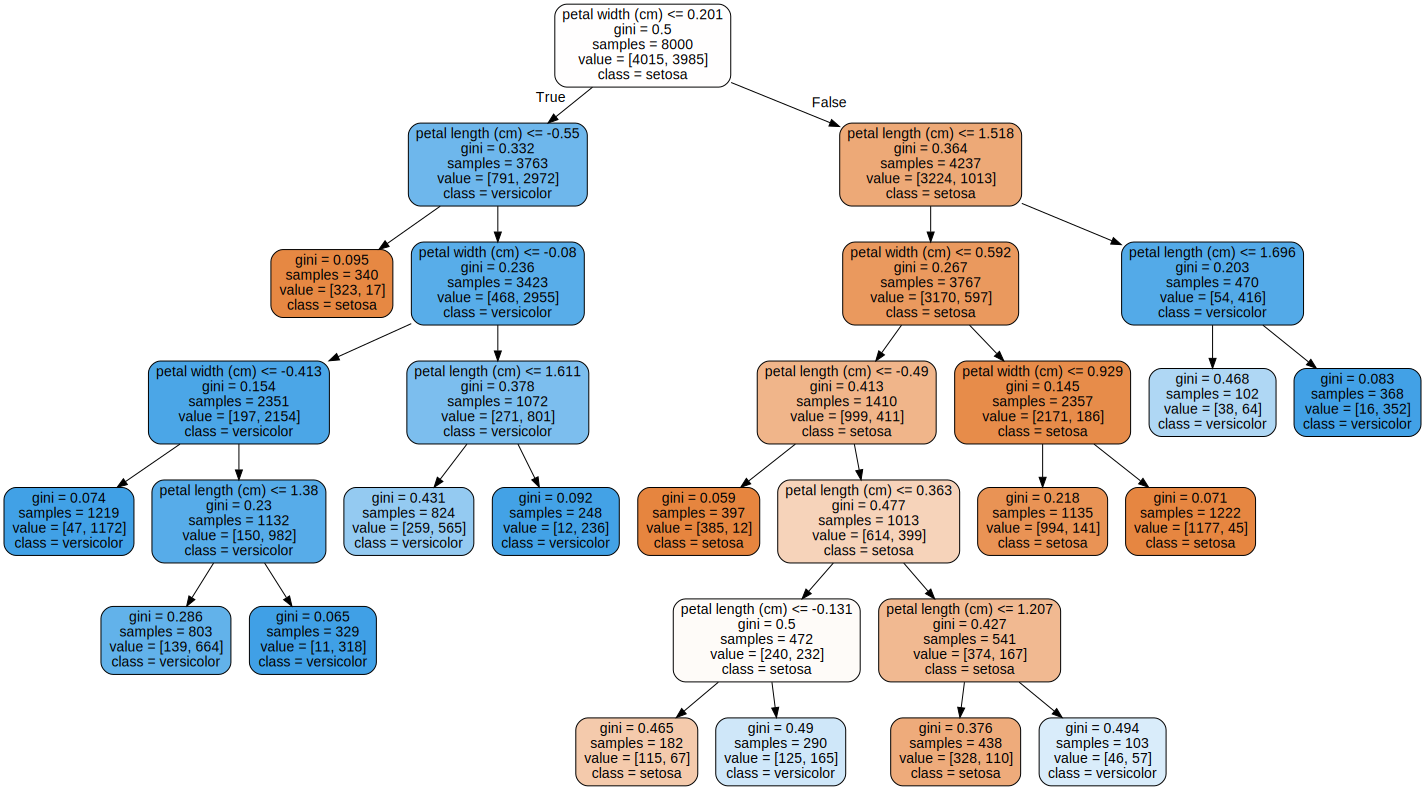

In [58]:
export_graphviz(grid_search_cv.best_estimator_,
                out_file=os.path.join(IMAGES_PATH, "iris_tree_best.dot"),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_best.dot"))

In [78]:
# Check Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

rfc_params = { 'n_estimators': list(range(100, 300, 20)), 'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [6, 7, 8, 9, 10], 'criterion' :['entropy']
                        }
rfc = RandomForestClassifier()

rfc_grid_cv = GridSearchCV(rfc, param_grid=rfc_params, cv=3, verbose=1, n_jobs=-2)
rfc_grid_cv.fit(X_train, y_train)

y_pred = rfc_grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

rfc_grid_cv.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 450 out of 450 | elapsed:  1.6min finished


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 240}

In [73]:
list(range(100, 300, 20))

[100, 120, 140, 160, 180, 200, 220, 240, 260, 280]

In [79]:
df2 = pd.DataFrame(rfc_grid_cv.cv_results_)[["rank_test_score", "params", "mean_test_score"]]\
    .sort_values(by="mean_test_score", ascending=False).head(10)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
 #   display(df2)
    
display(HTML(df2.to_html()))

,rank_test_score,params,mean_test_score
37,1,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 240}",0.863750
50,2,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}",0.863749
53,3,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 160}",0.863500
51,4,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 120}",0.863499
33,5,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 160}",0.863250
38,6,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 260}",0.863250
31,7,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 120}",0.863249
12,8,"{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 140}",0.863249
70,9,"{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}",0.863125
34,10,"{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 180}",0.863124
